In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = yf.download("WIPRO.NS", start="2023-01-01", end="2025-01-01")

# Display first 5 rows
data.head()

C:\Users\ROUNAK\AppData\Local\Temp\ipykernel_8384\727709901.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("WIPRO.NS", start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2023-01-02,188.113312,188.520124,186.892890,188.089388,5559512
2023-01-03,190.027725,190.362750,187.467232,188.113329,5994422
2023-01-04,186.510025,190.243091,185.983563,190.243091,8926522
2023-01-05,185.169952,187.706536,183.662368,186.653612,9568980
2023-01-06,182.824799,186.079266,182.537636,185.217793,8484754


In [19]:
# Use 'Adj Close' if available, otherwise 'Close'
if 'Adj Close' in data.columns:
    price_col = 'Adj Close'
else:
    price_col = 'Close'

In [20]:
# Compute log returns
data['LogReturn'] = np.log(data[price_col] / data[price_col].shift(1))
data = data.dropna().copy()

In [21]:
# Classify outcomes: -1 (negative), 0 (zero), 1 (positive)
def classify(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

data['Outcome'] = data['LogReturn'].apply(classify)

In [22]:
# Ensure all outcomes (-1, 0, 1) exist as columns
for col in [-1, 0, 1]:
    if col not in freq_df.columns:
        freq_df[col] = 0

In [23]:
 #Relative frequency over time
relative_frequencies = []
N = []
for i in range(1, len(data)+1):
    freq = data['Outcome'].iloc[:i].value_counts(normalize=True).to_dict()
    relative_frequencies.append(freq)
    N.append(i)

In [24]:
# Convert to DataFrame
freq_df = pd.DataFrame(relative_frequencies).fillna(0)
freq_df['N'] = N

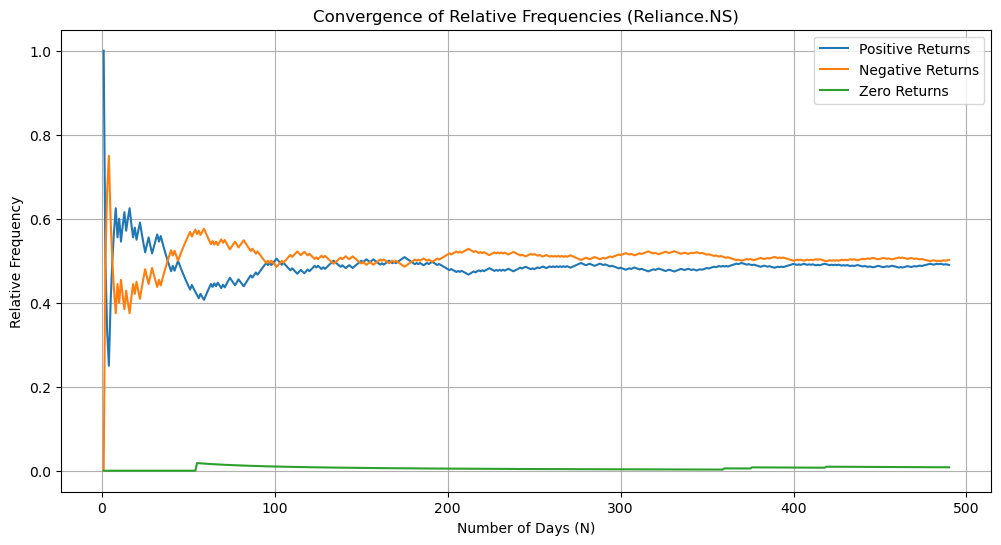

In [25]:
# Plot convergence of relative frequencies
plt.figure(figsize=(12,6))
plt.plot(freq_df['N'], freq_df[1], label="Positive Returns")
plt.plot(freq_df['N'], freq_df[-1], label="Negative Returns")
plt.plot(freq_df['N'], freq_df[0], label="Zero Returns")
plt.xlabel("Number of Days (N)")
plt.ylabel("Relative Frequency")
plt.title("Convergence of Relative Frequencies (Wipro.NS)")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Final estimated probabilities
print("Estimated probabilities (long-run):")
print(freq_df.iloc[-1][[1, -1, 0]])

Estimated probabilities (long-run):
1     0.489796
-1    0.502041
0     0.008163
Name: 489, dtype: float64
